#Notebook purpose:   

###plot all the figures to be used in the computational optogenetics paper

# Helper functions

In [37]:
# import:
import run_analysis
import os
print os.getcwd()
os.chdir('/home/sjarvis1/workspace/co_optogenetics')
print os.getcwd()
import numpy as np
import math
%load_ext autoreload
%autoreload 2
reload(run_analysis)

/home/sjarvis1/workspace/co_optogenetics
/home/sjarvis1/workspace/co_optogenetics
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'run_analysis' from '/home/sjarvis1/workspace/co_optogenetics/src/run_analysis.pyc'>

In [2]:
def plot_trialSet(basenames,trialInstances,variables,trials,trialLabels,labels,var_format,exp_params={},extractSpikes=True):
    """
    
    
    """
    af = run_analysis.AnalyticFrame()
    # set tstart,tstop for each experiment - technically don't have to do this, as the analysis has already been performed
    af.update_params(exp_params)
    # set up data structure for each experiment
    af.populate_trialset(basenames, trialInstances, variables, trials, trialLabels, labels, var_format)
    for exp in af.experimentset:
        exp.load_experiments()
        exp.collate_results()
    return af# helper functions
def plot_experiment(expname, expdescript, explabel, variables, exp_params={}):
    """
    This assumes that the analysis (i.e. extract spikes and calculate FI/FI_bg/etc) has already been performed
    
    @param
        expname
        expdescript     array of experiment names to go in one set
        explabel        
        variables       array of the variable we're looping over i.e. factors
        exp_params      dictionary of setup params for that experiment i.e. {"tstart":100,"tstart_bg":50} etc
    """
    af = run_analysis.AnalyticFrame()
    # set tstart,tstop for each experiment - technically don't have to do this, as the analysis has already been performed
    af.update_params(exp_params)
    # set up data structure for each experiment
    af.populate_expset(expname,expdescript,explabel, [variables])
    # load *results.pkl for each experiment
    af.submenu_load()
    # return AnalyticFrame for further plotting, etc.
    return af
    
 
def plot_trialSet(basenames,trialInstances,variables,trials,trialLabels,labels,var_format,exp_params={},extractSpikes=True):
    """
    
    
    """
    af = run_analysis.AnalyticFrame()
    # set tstart,tstop for each experiment - technically don't have to do this, as the analysis has already been performed
    af.update_params(exp_params)
    # set up data structure for each experiment
    af.populate_trialset(basenames, trialInstances, variables, trials, trialLabels, labels, var_format)
    for exp in af.experimentset:
        exp.load_experiments()
        exp.collate_results()
    return af
 
    
def convert_expData(data):
    """
    Helper function to wrap the data --> af format
    """
    newdata= {'tstart':data['light_on'],'tstop':data['light_on']+data['light_dur'],
                              'tstart_bg': 50,'tstop_bg':data['light_on'],
                              'tstart_post':data['light_on']+data['light_dur'],'tstop_post':data['tstop']}
    return newdata

#### TODO:

* supress stdout -->DONE: add %%capture as first line in each cell when working
* set cmap for each plot --> DONEadded function to AnalyticFrame that allows update of cmap
* add fitting of $log$.$H(\theta)$ for stellate neurons --> DONE (but it's not working great)
* add fitting of powerlaw for stellate neurons --> DONE, and works great! :)
* define own colormaps in AF --> DONE. Using af.update_cmap(9) to use BLUE-->ORANGE
* save plots as svg (or next best) format --> DONE
* repeat Fig2 in vitro for same irradiance as in vivo (i.e. irr = 0.002)
* repeat Fig2 in vivo for high irradiance to obtain gain modulation curve --> DONE. Output = NpHR.factor
* in vitro experiments to I>=3Amp so that response is saturated --> DONE

# Figure 1: Abstract neurons

Relevant experiments:

*      140305_compare_equal_branches



In [20]:
light_on = 1000
light_dur = 1500
tstop = 3500
factors = [0.5,2,1.5,1.,0.75,1.25]
factors.sort()
exp = 'whole'
Js = [2.]
freqs = range(10,101,10)
descript = 'distal'


def generate_abstract_FI(tree):
    af = run_analysis.AnalyticFrame()
    af.update_params({'tstart':light_on,'tstop':light_on+light_dur, 
                     'tstart_bg': 0,'tstop_bg':light_on,
                     'tstart_post':light_on+light_dur,'tstop_post':tstop})



    exp_comp_list = [['irr0.05'+'_factor%.2f'%(factor)+'_nb%g_ns%g_nl%g_'%(tree[0],tree[1],tree[2])+'spikes%g'+'_loc%g_J%.1f'%(tree[2]-1,Js[0])+'_NpHR_%s_ChR_%s'%(exp,exp),'%g'%factor] for factor in factors]
    print exp_comp_list

    expss = [ec[0] for ec in exp_comp_list]
    explabels = [ec[1] for ec in exp_comp_list]
    af.populate_expset(expbase,expss,explabels,[freqs])


    af.update_cmap(9)
    af.submenu_load()
    af.submenu_print()
    #af.submenu_plot(5, expbase+'FI_gain_irr%.2f_tree%s_varyFactor_exp%s%s_'%(0.05,tree,exp,exp))
    #af.submenu_plot(0, expbase+'FI_gain_irr%.2f_tree%s_varyFactor_exp%s%s_'%(0.05,tree,exp,exp))
    af.submenu_plot(10, expbase+'FI_gain_bg_irr%.2f_tree%s_%s_varyFactor_exp%s%s_'%(0.05,tree,descript,exp,exp))




In [22]:
%%capture
# Plot gain modulation for a 'good' configuration
# 140305_compare_equal_branchesFI_gain_bg_irr0.05_tree(4, 5, 3)_distal_varyFactor_expwholewhole_FIfit_bg_140314__poly

expbase = '140305_compare_equal_branches'
tree = (4, 5, 3)
generate_abstract_FI(tree)


In [255]:
exp = 'whole'
tree = (4, 5, 3)
factors = [0.5,0.75,1.,1.25,1.5,2.]
freqs = range(10,101,10)


af = run_analysis.AnalyticFrame()
af.update_params({'tstart':light_on,'tstop':light_on+light_dur,
                  'tstart_bg': 0,'tstop_bg':light_on,
                  'tstart_post':light_on+light_dur,'tstop_post':tstop})

descript = 'soma'
exp_comp_list = [['irr0.05'+'_factor%.2f'%(factor)+'_nb%g_ns%g_nl%g_'%(tree[0],tree[1],tree[2])+'spikes%g'+'_loc%s_J%.1f'%('soma',Js[0])+'_NpHR_%s_ChR_%s'%(exp,exp),'%g'%factor] for factor in factors]
print exp_comp_list

expss = [ec[0] for ec in exp_comp_list]
explabels = [ec[1] for ec in exp_comp_list]
af.populate_expset(expbase,expss,explabels,[freqs])
af.submenu_extractSpikes()
"""

af.submenu_runFI()
for exp in af.experimentset:
    exp.calculate_responses('FI')
    exp.calculate_responses('FI_bg')
    exp.calculate_responses('FI_post')
af.submenu_save()

"""
af.submenu_load()
#af.submenu_print()
af.submenu_plot(5, 'Fig1_somaInj_nb%g_ns%g_nl%g_'%(tree[0],tree[1],tree[2])+'_inj%s'%(descript))
#af.submenu_plot(0, self.expbase+'FI_gain_irr%.2f_tree%s_varyFactor_exp%s%s_'%(0.05,tree,exp[0],exp[1]))
af.submenu_plot(10,'Fig1_somaInjbg_nb%g_ns%g_nl%g_'%(tree[0],tree[1],tree[2])+'inj%s'%(descript))

jet <type 'str'>
--->  jet <type 'str'>
Updated parameters. New parameters are: {'tstart_bg': 0, 'v_th': -20.0, 'tstop_bg': 2100, 'tstop_post': 4000, 'prebuffer': 300, 'tstart_post': 3100, 'tstart': 2100, 'tstop': 3100, 'postbuffer': 150}
[['irr0.05_factor0.50_nb4_ns5_nl3_spikes%g_locsoma_J2.0_NpHR_whole_ChR_whole', '0.5'], ['irr0.05_factor0.75_nb4_ns5_nl3_spikes%g_locsoma_J2.0_NpHR_whole_ChR_whole', '0.75'], ['irr0.05_factor1.00_nb4_ns5_nl3_spikes%g_locsoma_J2.0_NpHR_whole_ChR_whole', '1'], ['irr0.05_factor1.25_nb4_ns5_nl3_spikes%g_locsoma_J2.0_NpHR_whole_ChR_whole', '1.25'], ['irr0.05_factor1.50_nb4_ns5_nl3_spikes%g_locsoma_J2.0_NpHR_whole_ChR_whole', '1.5'], ['irr0.05_factor2.00_nb4_ns5_nl3_spikes%g_locsoma_J2.0_NpHR_whole_ChR_whole', '2']]
6 ['140305_compare_equal_branches', '140305_compare_equal_branches', '140305_compare_equal_branches', '140305_compare_equal_branches', '140305_compare_equal_branches', '140305_compare_equal_branches']
6 ['irr0.05_factor0.50_nb4_ns5_nl3_spikes%g_l

In [23]:
# Plot gain modulation for a 'bad' configuration
# 140305_compare_equal_branchesFI_gain_bg_irr0.05_tree(2, 2, 6)_distal_varyFactor_expwholewhole_FIfit_bg_140314__poly
# 140305_compare_equal_branchesFI_gain_bg_irr0.05_tree(2, 61, 2)_distal_varyFactor_exppartialSamepartialSame_FIfit_bg_140314__poly

expbase = '140305_compare_equal_branches'
tree = (2, 2, 6)
generate_abstract_FI(tree)
tree = (2, 61, 2)
generate_abstract_FI(tree)

jet <type 'str'>
--->  jet <type 'str'>
Updated parameters. New parameters are: {'tstart_bg': 0, 'v_th': -20.0, 'tstop_bg': 1000, 'tstop_post': 3500, 'prebuffer': 300, 'tstart_post': 2500, 'tstart': 1000, 'tstop': 2500, 'postbuffer': 150}
[['irr0.05_factor0.50_nb2_ns2_nl6_spikes%g_loc5_J2.0_NpHR_whole_ChR_whole', '0.5'], ['irr0.05_factor0.75_nb2_ns2_nl6_spikes%g_loc5_J2.0_NpHR_whole_ChR_whole', '0.75'], ['irr0.05_factor1.00_nb2_ns2_nl6_spikes%g_loc5_J2.0_NpHR_whole_ChR_whole', '1'], ['irr0.05_factor1.25_nb2_ns2_nl6_spikes%g_loc5_J2.0_NpHR_whole_ChR_whole', '1.25'], ['irr0.05_factor1.50_nb2_ns2_nl6_spikes%g_loc5_J2.0_NpHR_whole_ChR_whole', '1.5'], ['irr0.05_factor2.00_nb2_ns2_nl6_spikes%g_loc5_J2.0_NpHR_whole_ChR_whole', '2']]
6 ['140305_compare_equal_branches', '140305_compare_equal_branches', '140305_compare_equal_branches', '140305_compare_equal_branches', '140305_compare_equal_branches', '140305_compare_equal_branches']
6 ['irr0.05_factor0.50_nb2_ns2_nl6_spikes%g_loc5_J2.0_NpHR_whol

In [ ]:
# Plot M vs branching vs polarity

In [ ]:
# Plot attenuation along branch of each

In [ ]:
# Gain modulation as a function of input location

# Figure 2: L5PC neuron

Relevant experiments:

* 130709_increasing_uneq_irradiance_factor_somacurr (iclamp at soma)
* 130710_distalcurr_unequal_irradiance (iclamp at distal)
* 140723_L5PC_basal_irr (in vivo)
* 130711_illumination_unequal_irradiance (opsin only)
* 140616_replay_input_apic (replay, also used in low-level, in vivo)
* 1505?? (replay traces, input to both apic and basal)

In [ ]:
#### plot shape

In [ ]:
# plot firing traces

In [3]:
%%capture
# plot in vitro, soma injection
reload(run_analysis)
expL5PC_vitroSoma = {'filebase': '130709_increasing_uneq_irradiance_factor_somacurr',
                'light_on': 700,
                'light_dur': 1000,
                'tstop': 2500,
                'current_amps': np.arange(-2.,2.01,0.1),
                'factors': [0.125,0.25,0.5,1.,2.,4.,8.] ,
                'irrs': [1.0]}
description = ['whole','whole']
irr= expL5PC_vitroSoma['irrs'][0]
exp_descript = ['_irr%.1f'%(irr)+'_factor%.2f'%(f)+'_Isoma%.1f_'+'NpHR_%s_ChR_%s'%(description[1],description[0]) for f in expL5PC_vitroSoma['factors']]
exp_labels = ['%g'%f for f in expL5PC_vitroSoma['factors']]
af = plot_experiment(expL5PC_vitroSoma['filebase'],exp_descript,exp_labels,expL5PC_vitroSoma['current_amps'],convert_expData(expL5PC_vitroSoma));
af.update_cmap(10)
af.submenu_plot(5, 'Fig2_L5PC_vitroSoma_'+expL5PC_vitroSoma['filebase']+'FI_gain_irr%.1f_varyFactor_exp%s%s_'%(irr,description[0],description[1]))

In [5]:
%%capture
# plot in vitro, apic injection

# NB: Distal point = 620 from soma

# NOTE: there was a FU when naming this experiment, so the generating script is: 130710_distalcurrent
# BUT the expbase is 130710_increasing_uneq_irradiance_factor_somacurr
expL5PC_vitroDistal = {'filebase': '130710_increasing_uneq_irradiance_factor_somacurr',
                'light_on': 700,
                'light_dur': 1000,
                'tstop': 2500,
                'current_amps': np.arange(-2.,2.01,0.1),
                'factors': [0.125,0.25,0.5,1.,2.,4.,8.] ,
                'irrs': [1.0]}
description = ['whole','whole']
irr= expL5PC_vitroDistal['irrs'][0]
exp_descript = ['_irr%.1f'%(irr)+'_factor%.2f'%(f)+'_Idist%.1f_'+'NpHR_%s_ChR_%s'%(description[1],description[0]) for f in expL5PC_vitroDistal['factors']]
exp_labels = ['%g'%f for f in expL5PC_vitroDistal['factors']]
af = plot_experiment(expL5PC_vitroDistal['filebase'],exp_descript,exp_labels,expL5PC_vitroDistal['current_amps'],convert_expData(expL5PC_vitroDistal));
af.update_cmap(10)
af.submenu_plot(5, 'Fig2_L5PC_vitroDistal_'+expL5PC_vitroDistal['filebase']+'FI_gain_irr%.1f_varyFactor_exp%s%s_'%(irr,description[0],description[1]))

In [6]:
%%capture
# plot in vivo

L5PCdata = {'filebase': '140723_L5PC_basal_irr_ChRonly',
                'light_on': 1050,
                'light_dur': 1000,
                'tstop': 2100,
                'freqs': range(2,15,2)+range(15,151,5),
                'Js':[2.],
                'nsite_range': [80],
                'factors': [0.001,0.125,0.25,0.5,0.75,1.] ,
                'irrs': [0.002]}

description = ['whole','whole']

for irr in L5PCdata['irrs']:
    exp_descript = ['irr%.3f_'%irr+'factor%.2f_'%f+'freq%g'+'_J%g_nsites%g'%(L5PCdata['Js'][0],L5PCdata['nsite_range'][0])+'_NpHR_%s_ChR_%s'%(description[1],description[0]) for f in L5PCdata['factors']]
    exp_labels = ['%.2f'%f for f in L5PCdata['factors']]
    af = plot_experiment(L5PCdata['filebase'],exp_descript,exp_labels,L5PCdata['freqs'],convert_expData(L5PCdata));
    af.update_cmap(10)
    af.submenu_plot(10, 'Fig2_L5PC_vivo_'+L5PCdata['filebase']+'FI_gain_irr%.1f_varyFactor_exp%s%s_'%(irr,description[0],description[1]))

In [3]:
%%capture
# plot illumination only



expL5PC_light = {'filebase': '130711_illumination_uneq_irradiance',
                'light_on': 700,
                'light_dur': 1000,
                'tstop': 2500,
                'current_amps': np.arange(-2.,2.01,0.1),
                'factors': [0.125,0.25,0.5,1.,2.,4.,8.] ,
                'irrs': np.arange(0,5.1,0.5)}

explist = [['whole','whole'],['apical','apical']] 
for (i,expli) in enumerate(explist):
    exp_descript = ['_irr%.1f'+'_factor%.2f'%(factor)+'_NpHR_%s_ChR_%s'%(expli[1],expli[0]) for factor in expL5PC_light['factors']]
    exp_labels = ['%g'%f for f in expL5PC_light['factors']]
    af = plot_experiment(expL5PC_light['filebase'],exp_descript,exp_labels,expL5PC_light['irrs'],convert_expData(expL5PC_light));
    af.update_cmap(10)
    if i==0:
        continue
        #af.submenu_plot(5, 'Fig2_L5PC_light_'+expL5PC_light['filebase']+'FI_gain_varyFactor_exp%s%s_'%(expli[0],expli[1]))
    else:
        af.submenu_plot(5, 'Fig5_L5PC_light_partial'+expL5PC_light['filebase']+'FI_gain_varyFactor_exp%s%s_'%(expli[0],expli[1]))
        


# Figure 3: Stellate

Relevant experiments:

* 140408_scan_SHstell (in vitro, and in vivo)

In [8]:
## Common data
stell_data = {'filebase': '140408_scan_SHstell',
               'light_on': 700,
                'light_dur': 1000,
                'tstop': 2700,
                'current_amps': np.arange(-1.,3.1,0.2),
                'freqs': range(10,201,10),
                'Js':[2.],
                'nsite_range': [40],
                'stimlocs': ['stim2','stim3'],
                #'factors': [ 0.0625, 0.125,0.25,0.375,0.5,0.75,1.,1.5,2.],
                'factors': [0.0625,0.125, 0.25,0.375,0.5,0.75,1.,1.5,2.],
                'irrs': [0.007,0.012]}

In [50]:
# plot shape

# plot - find location of stim2 = select_section_posn_bydistance for [100.3,100.4]
# while stim3 = select_section_posn_bydistance for [304,305]

In [9]:
%%capture
reload(run_analysis)
# plot in vitro
description = ['whole','whole']
stimloc = stell_data['stimlocs'][0]
for irr in stell_data['irrs']:
    exp_descript = ['irr%.3f_'%irr+'factor%.2f_'%f+'I%.2f'+'_stimloc_%s'%(stimloc)+'_NpHR_%s_ChR_%s'%(description[1],description[0]) for f in stell_data['factors']]
    exp_labels = ['%.3f'%f for f in stell_data['factors']]
    af = plot_experiment(stell_data['filebase'],exp_descript,exp_labels,stell_data['current_amps'],convert_expData(stell_data));
    af.update_cmap(9)
    af.submenu_plot(5, 'Fig3_stellate_vitro_'+stell_data['filebase']+'FI_gain_irr%.3f_varyFactor_exp%s%s_'%(irr,description[0],description[1]))
    #af.submenu_plot(0, 'Fig3_stellate_vitro_'+stell_data['filebase']+'FI_gain_irr%.3f_varyFactor_exp%s%s_'%(irr,description[0],description[1]))
    

In [52]:
for irr in stell_data['irrs']:%%capture
# plot in vivo
description = ['whole','whole']
for irr in stell_data['irrs']:
    exp_descript = ['irr%.3f_'%irr+'factor%.2f_'%f+'freq%g'+'_J%g'%(2.)+'_NpHR_%s_ChR_%s'%(description[1],description[0]) for f in stell_data['factors']]
    exp_labels = ['%.3f'%f for f in stell_data['factors']]
    af = plot_experiment(stell_data['filebase'],exp_descript,exp_labels,stell_data['freqs'],convert_expData(stell_data));
    af.update_cmap(9)
    af.submenu_plot(5, 'Fig3_stellate_vivo_'+stell_data['filebase']+'FI_gain_irr%.3f_varyFactor_exp%s%s_'%(irr,description[0],description[1]))
    af.submenu_plot(10, 'Fig3_stellate_vivo_bg_'+stell_data['filebase']+'FI_gain_irr%.3f_varyFactor_exp%s%s_'%(irr,description[0],description[1]))


In [ ]:
# plot voltage traces

In [54]:
#irr
%%capture
# plot for multiple trials - in vivo:
basename = "150616_n50_stellate"
factors = [ 0.0625, 0.125,0.25,0.375,0.5,0.75,1.,1.5,2.]
for irr in stell_data['irrs']:
    instances = ["irr%.3f"%irr+"_factor%.2f"%factor+"_freq%g_J2_trial%s_NpHR_whole_ChR_whole" for factor in factors]
    variables = range(10,201,10)
    trials = range(5)
    trialLabels = ['%.2f'%f for f in factors]
    labels = ["freq%g"%f for f in variables]
    var_format = '%g'
    af = plot_trialSet(basename,instances,stell_data['freqs'],trials,trialLabels,labels,var_format)
    af.update_cmap(9)
    af.submenu_plot(10, 'Fig3_stellate_vivo_bg_trials'+'FIbg_gain_irr%.3f_varyFactor_trialled_invivo_exp%s%s_'%(irr,description[0],description[1])) 
   

jet <type 'str'>
--->  jet <type 'str'>
Updated parameters. New parameters are: {'tstart_bg': 50, 'v_th': -20.0, 'tstop_bg': 750, 'tstop_post': 2700, 'prebuffer': 300, 'tstart_post': 1700, 'tstart': 750, 'tstop': 1700, 'postbuffer': 150}
9 ['140408_scan_SHstell', '140408_scan_SHstell', '140408_scan_SHstell', '140408_scan_SHstell', '140408_scan_SHstell', '140408_scan_SHstell', '140408_scan_SHstell', '140408_scan_SHstell', '140408_scan_SHstell']
9 ['irr%.3f_factor0.06_illOnly_NpHR_whole_ChR_whole', 'irr%.3f_factor0.12_illOnly_NpHR_whole_ChR_whole', 'irr%.3f_factor0.25_illOnly_NpHR_whole_ChR_whole', 'irr%.3f_factor0.38_illOnly_NpHR_whole_ChR_whole', 'irr%.3f_factor0.50_illOnly_NpHR_whole_ChR_whole', 'irr%.3f_factor0.75_illOnly_NpHR_whole_ChR_whole', 'irr%.3f_factor1.00_illOnly_NpHR_whole_ChR_whole', 'irr%.3f_factor1.50_illOnly_NpHR_whole_ChR_whole', 'irr%.3f_factor2.00_illOnly_NpHR_whole_ChR_whole']
9 ['0.062', '0.125', '0.250', '0.375', '0.500', '0.750', '1.000', '1.500', '2.000']
[[0.01

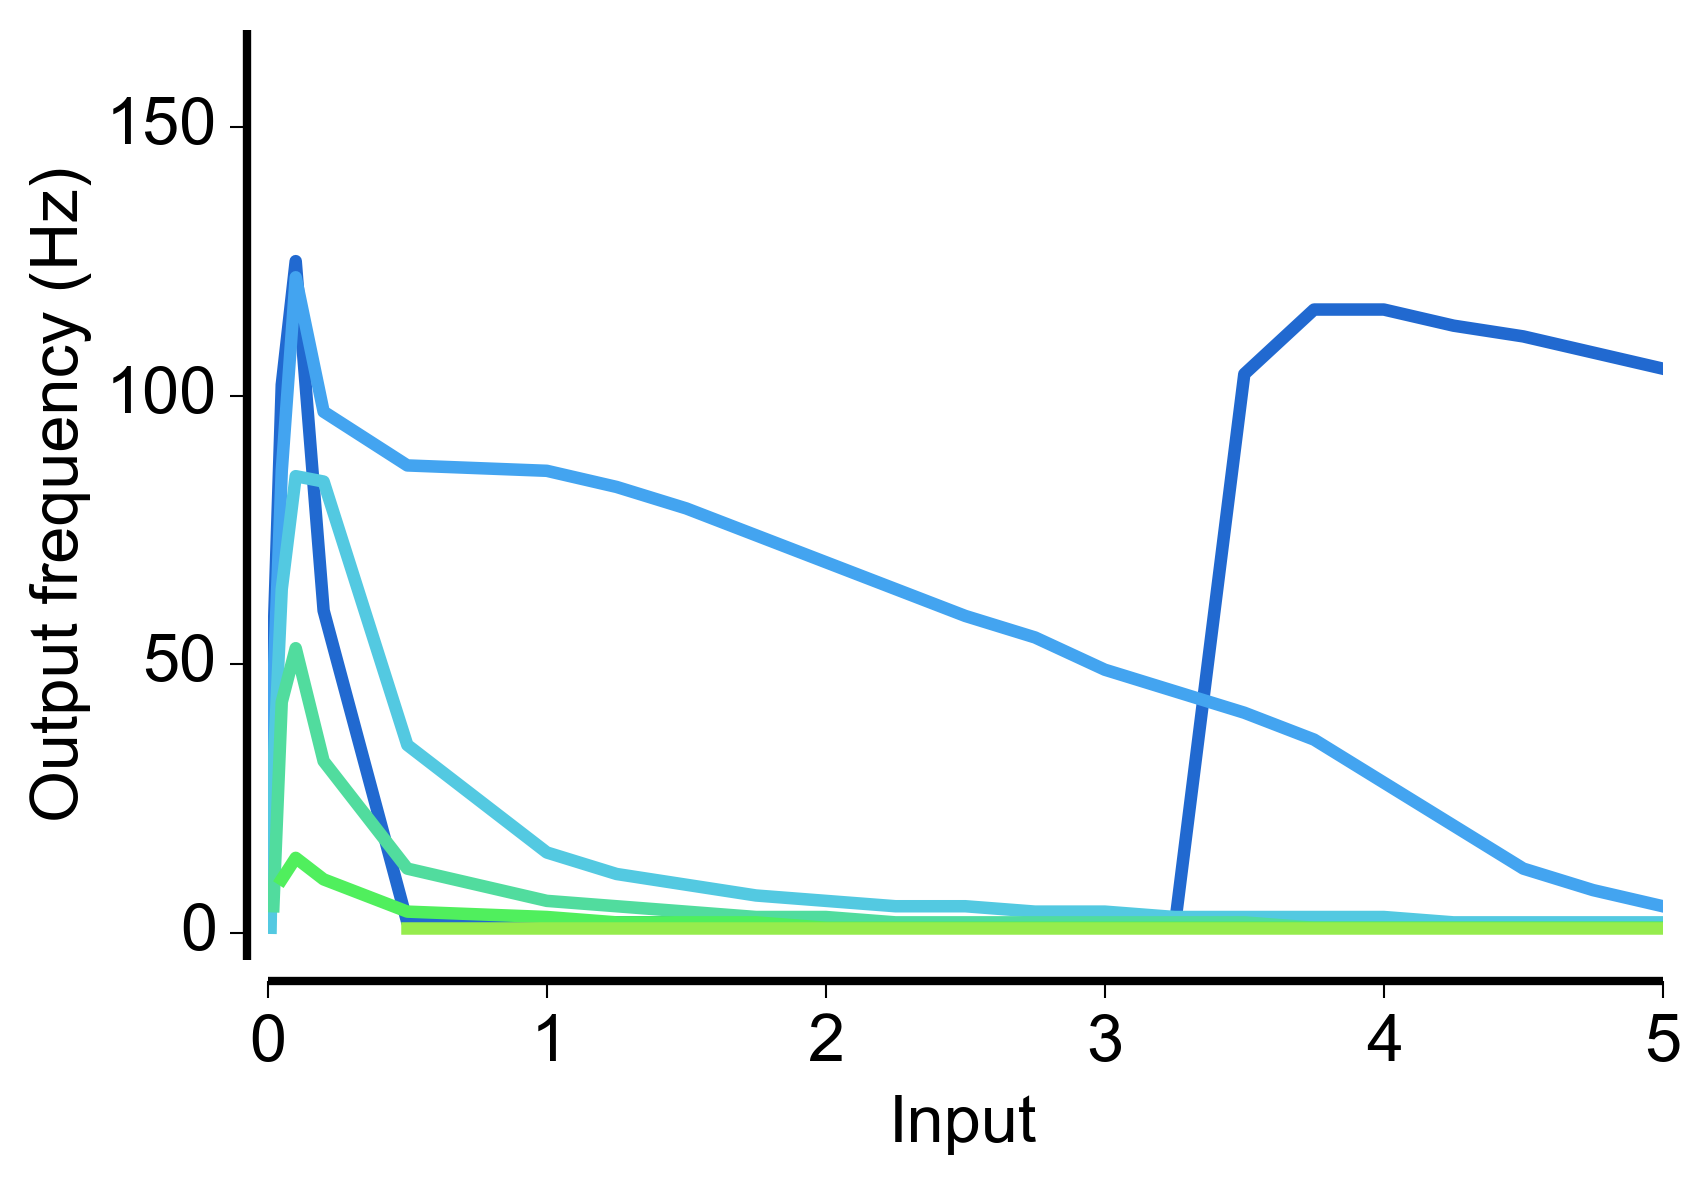

In [251]:
##%%capture
reload(run_analysis)
stell_data = {'light_on': 700+50,
                'light_dur': 1000-50,
                'tstop': 2700}
filebase ='140408_scan_SHstell'
factors = [ 0.0625, 0.125,0.25,0.375,0.5,0.75,1.,1.5,2.]
irrs = [ a*b for a in [0.01, 0.1] for b in [1,2,5]] + list(np.arange(1.,5.1,0.25)) 
# plot - illumination only
description = ['whole','whole']
exp_descript = ['irr%.3f_'+'factor%.2f_'%f+'illOnly'+'_NpHR_%s_ChR_%s'%(description[1],description[0]) for f in factors]
exp_labels = ['%.3f'%f for f in factors]
af = plot_experiment(filebase,exp_descript,exp_labels,irrs,convert_expData(stell_data));
af.update_cmap(9)
af.submenu_plot(5, 'Fig3_stellate_ill_'+filebase+'FI_gain_varyIrrFactor_exp%s%s_'%(description[0],description[1]))
af.submenu_plot(0, 'Fig3_stellate_ill_orig_'+filebase+'FI_gain_varyIrrFactor_exp%s%s_'%(description[0],description[1]))
   

# Figure 4: Partial illumination in abstract neurons

Relevant experiments:

* ...?

In [ ]:
# figure for partial illumination illustration

In [ ]:
# plot voltage attenuation along one trace when one branch is unilluminated

In [ ]:
# plot voltage attenuation along one trace when two branches are unilluminated

In [ ]:
# plot IF response for partial illumination when one branch is unilluminated

In [ ]:
# plot IF response for partial illumination when two branches-multiple branches are unilluminated

# Figure 5: Partial and graded illumination in L5PC

Relevant experiments:

* partial illumination: 130710_increasing_uneq_irradiance_factor_somacurr
* graded illumination:  150324_partialIllumination_dualOpsin

In [ ]:
figure# figure for partial illumination illustration

In [72]:
# plot IF response response when only apical dendrites are illuminated i.e. no driving current
# DONE: see Figure 2, illumination only

In [26]:
%%capture
#130710_increasing_uneq_irradiance_factor_somacurr130710_increasing_uneq_irradiance_factor_somacurr
# plot in vitro, apic injection

# NOTE: there was a FU when naming this experiment, so the generating script is: 130710_distalcurrent
# BUT the expbase is 130710_increasing_uneq_irradiance_factor_somacurr
expL5PC_vitroDistal = {'filebase': '130710_increasing_uneq_irradiance_factor_somacurr',
                'light_on': 700,
                'light_dur': 1000,
                'tstop': 2500,
                'current_amps': np.arange(-2.,2.01,0.1),
                'factors': [0.125,0.25,0.5,1.,2.,4.,8.] ,
                'irrs': [1.0]}
description = ['apical','apical']
irr= expL5PC_vitroDistal['irrs'][0]
exp_descript = ['_irr%.1f'%(irr)+'_factor%.2f'%(f)+'_Idist%.1f_'+'NpHR_%s_ChR_%s'%(description[1],description[0]) for f in expL5PC_vitroDistal['factors']]
exp_labels = ['%g'%f for f in expL5PC_vitroDistal['factors']]
af = plot_experiment(expL5PC_vitroDistal['filebase'],exp_descript,exp_labels,expL5PC_vitroDistal['current_amps'],convert_expData(expL5PC_vitroDistal));
af.update_cmap(9)
af.submenu_plot(5, 'Fig5_L5PC_vitroDistalApical_'+expL5PC_vitroDistal['filebase']+'FI_gain_irr%.1f_varyFactor_exp%s%s_'%(irr,description[0],description[1]))

In [63]:
#150324_partialIllumination_dualOpsin150324_partialIllumination_dualOpsin150324_partialIllumination_dualOpsin
%%capture
# plot trend --> creates 9 plots for irr and factors for graded illumination
expbase = '150324_partialIllumination_dualOpsin'
reload(run_analysis)
tstop = 1500
light_dur = 1100
light_on = 200
irrs = [0.01,0.02,0.05]
factors = [0.1,0.2,0.5]
gradients = np.arange(0.0,0.00101,0.0001)
#gradients = np.arange(0.0,0.00101,0.0002)
for irr in irrs:
    for fac in factors:
        af = run_analysis.AnalyticFrame()
        af.update_params({'label_format':'_irr%.2f_factor%g_ChRgrad%.4f_NpHRgrad%.4f_NpHR_whole_ChR_whole'})
        af.update_params({'tstart':light_on,'tstop':light_on+light_dur,
                              'tstart_bg': 0,'tstop_bg':light_on,
                              'tstart_post':light_on+light_dur,'tstop_post':tstop})
        
        exp_comp_list = [['_irr%.2f'%irr+'_factor%g'%fac+'_ChRgrad%.4f'+'_NpHRgrad%.4f_NpHR_whole_ChR_whole','..']]
        expss = [ec[0] for ec in exp_comp_list]
        explabels = [ec[1] for ec in exp_comp_list]
        af.populate_expset(expbase,expss,explabels, [gradients,gradients])
        af.submenu_load()
        af.submenu_print()
        labels = ['%.1f'%(g*1000) for g in gradients]
        af.update_cmap(12)
        af.submenu_plot(11, 'Fig5_2Dtrend_FI_gain_irr%.2f_factor%g_varyGradients'%(irr,fac),axestitles=['NpHR gradient (a.u.)','ChR2 gradient (a.u.)'],axeslabels=[labels,labels],plottitle='Graded illumination (irr=%.2f, E:I opsin factor=%.1f)'%(irr,fac))
        

## Figure 6: Subthreshold / smooth transition

Relevant experiments:

* 140616_replay_input_apic (replay traces, in vivo)
* 1505?? (replay traces, input to both apic and basal)

In [85]:
reload(run_analysis)

<module 'run_analysis' from '/home/sjarvis1/workspace/co_optogenetics/src/run_analysis.pyc'>

In [152]:
%%capture
# FF and CVISI
# 140616_replay_input_apic.py
light_on = 2100
light_dur = 1000
tstop = 4000
exp_fixedInput = {
    'filebase': '140616_replay_input_apic',
    'light_on':2000,
    'light_dur': 1000,
    'tstop': 4000,
    'factors': [0.125,0.25,0.5,1.,2.,4.,8.],
    #'irrs': [0.,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]+[0.5]+range(1,6),
    'irrs': [ a*b for a in [0.01, 0.1, 1.] for b in [1,2,5]], #range(1,6),
    'freq': 80,
    'J': 0.5,
    'syn_factor': -0.05,
}

af = run_analysis.AnalyticFrame()
af.update_params({'tstart':light_on,'tstop':light_on+light_dur,
                              'tstart_bg': 0,'tstop_bg':light_on,
                              'tstart_post':light_on+light_dur,'tstop_post':tstop})
        
af.update_cmap(9)
description = 'irr%.3f_factor%.2f_spikes80_J0.5_cellL5PC_inh-0.05_freqfactor1_shuffle0_stimpoisson_NpHR_whole_ChR_whole'#%(irr,factor)
exp_comp_list = [[description,'']]
expss = [ec[0] for ec in exp_comp_list]
explabels = [ec[1] for ec in exp_comp_list]
af.populate_expset(exp_fixedInput['filebase'],expss,explabels, [exp_fixedInput['irrs'], exp_fixedInput['factors']]) 
                                                               

In [154]:
%%capture
#af.perform_analysis(['isi'],recalc=True)
af.perform_analysis(['isi'])
af.submenu_save()

in expset =  ['isi']
About to run analysis for  140616_replay_input_apicirr0.010_factor0.12_spikes80_J0.5_cellL5PC_inh-0.05_freqfactor1_shuffle0_stimpoisson_NpHR_whole_ChR_whole
Looking at property isi
{'isi': array([  38.   ,  100.825,   45.025,   91.4  ,   46.25 ,   78.8  ,
         68.45 ,   75.   ,   61.75 ,   77.65 ,   54.725,   58.   ]), 'cv_isi': 0.27755801703822514, 'ff_isi': 5.1094148865807973}
Attempting to save to file: experiments/140616_replay_input_apic/pkl/140616_replay_input_apicirr0.010_factor0.12_spikes80_J0.5_cellL5PC_inh-0.05_freqfactor1_shuffle0_stimpoisson_NpHR_whole_ChR_whole_results.pkl ... saved successfully
Attempting to save to file: experiments/140616_replay_input_apic/pkl/140616_replay_input_apicirr0.010_factor0.12_spikes80_J0.5_cellL5PC_inh-0.05_freqfactor1_shuffle0_stimpoisson_NpHR_whole_ChR_whole_results.pkl ... saved successfully
About to run analysis for  140616_replay_input_apicirr0.010_factor0.25_spikes80_J0.5_cellL5PC_inh-0.05_freqfactor1_shuffle0_s

In [155]:
%%capture
af.submenu_load()
af.submenu_print()

Load values
Loading ExperimentSet 
Attempting to load file: experiments/140616_replay_input_apic/pkl/140616_replay_input_apicirr0.010_factor0.12_spikes80_J0.5_cellL5PC_inh-0.05_freqfactor1_shuffle0_stimpoisson_NpHR_whole_ChR_whole_results.pkl ... loaded successfully
isi [  38.     100.825   45.025   91.4     46.25    78.8     68.45    75.
   61.75    77.65    54.725   58.   ]
cv_isi 0.277558017038
ff_isi 5.10941488658
Attempting to load file: experiments/140616_replay_input_apic/pkl/140616_replay_input_apicirr0.010_factor0.25_spikes80_J0.5_cellL5PC_inh-0.05_freqfactor1_shuffle0_stimpoisson_NpHR_whole_ChR_whole_results.pkl ... loaded successfully
isi [ 116.825   90.45    62.95    89.625   40.45   113.675   79.8     67.625
   95.7     54.475   93.4  ]
cv_isi 0.277198839861
ff_isi 6.32159564921
Attempting to load file: experiments/140616_replay_input_apic/pkl/140616_replay_input_apicirr0.010_factor0.50_spikes80_J0.5_cellL5PC_inh-0.05_freqfactor1_shuffle0_stimpoisson_NpHR_whole_ChR_whole_r

In [207]:
rr = af.get_analysis_values('ff_isi')
ss = af.get_analysis_values('cv_isi')

In [159]:
n_factors = len(exp_fixedInput['factors'])
n_irrs = len(exp_fixedInput['irrs'])

In [211]:
import pylab
%pylab inline
from run_analysis import ExperimentPlotter
from matplotlib import cm, colors
reload(run_analysis)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<module 'run_analysis' from '/home/sjarvis1/workspace/co_optogenetics/src/run_analysis.pyc'>

In [212]:
intensities = np.linspace(0.1, 0.9, n_irrs)
expPlot = ExperimentPlotter()
expPlot.update_cmap_index(9)

jet <type 'str'>
--->  jet <type 'str'>
CMAP_BLUE_ORANGE <type 'str'>


In [213]:
def turn_off_border(ax,turnoffs=['right','top']):
    for loc, spine in ax.spines.iteritems():
        if loc not in turnoffs:
            spine.set_position(('outward',5))
            ax.tick_params(direction='out')
        elif loc in turnoffs:
            #spine.set_color('none') # don't draw spine
            spine.set_visible(False)
            #ax.tick_params([])
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

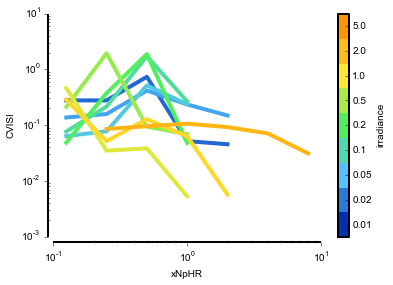

In [231]:
pylab.figure()

for i in range(n_irrs):
    #print i*n_factors,(i+i)*n_factors
    y_cvisi = ss[0][i*n_factors:(i+1)*n_factors]
    #print y_cvisi
    c=expPlot._get_color(m,intensities[i])
    pylab.plot(exp_fixedInput['factors'],y_cvisi,c=c)

turn_off_border(pylab.gca())    
pylab.yscale('log')  
pylab.xscale('log')


m = cm.ScalarMappable(cmap=expPlot.get_cmap())
m.set_array(intensities)
dc = intensities[1]-intensities[0]


mapint = np.linspace(0.1-dc/2, 0.9+dc/2, n_irrs+1)
cb = pylab.colorbar(m,ticks=intensities,boundaries=mapint)
cb.set_label('irradiance')
cb.set_ticklabels(exp_fixedInput['irrs'])

pylab.xlabel('xNpHR')
pylab.ylabel('CVISI')

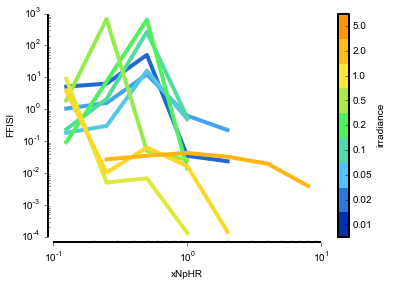

In [230]:
pylab.figure()
for i in range(n_irrs):
    #print exp_fixedInput['irrs'][i],i*n_factors,(i+1)*n_factors
    y_ff = rr[0][i*n_factors:(i+1)*n_factors]
    #print y_ff
    c=expPlot._get_color(m,intensities[i])
    pylab.plot(exp_fixedInput['factors'],y_ff,c=c)

turn_off_border(pylab.gca())
pylab.yscale('log')
pylab.xscale('log')

m = cm.ScalarMappable(cmap=expPlot.get_cmap())
m.set_array(intensities)
dc = intensities[1]-intensities[0]


mapint = np.linspace(0.1-dc/2, 0.9+dc/2, n_irrs+1)
cb = pylab.colorbar(m,ticks=intensities,boundaries=mapint)
cb.set_label('irradiance')
cb.set_ticklabels(exp_fixedInput['irrs'])

pylab.xlabel('xNpHR')
pylab.ylabel('FFISI')
